In [4]:
!pip install matplotlib



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
!pip install scikit-learn


  Using cached scikit_learn-1.6.1-cp312-cp312-win_amd64.whl.metadata (15 kB)
  Using cached scipy-1.15.2-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.1-cp312-cp312-win_amd64.whl (11.1 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.15.2-cp312-cp312-win_amd64.whl (40.9 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# GaussianMixtureModel

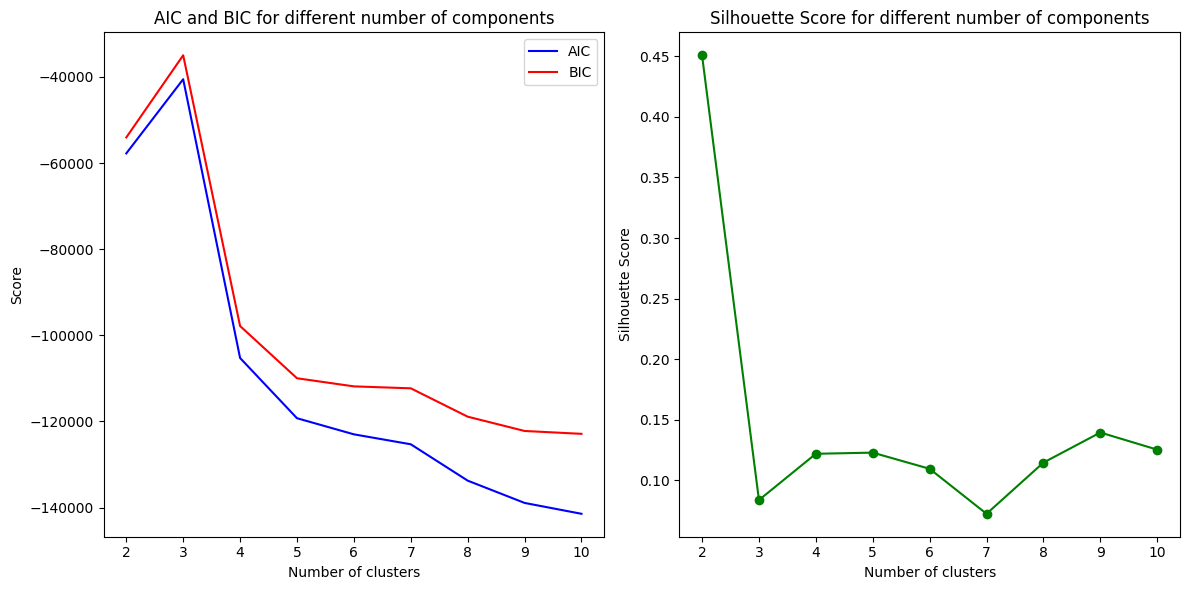

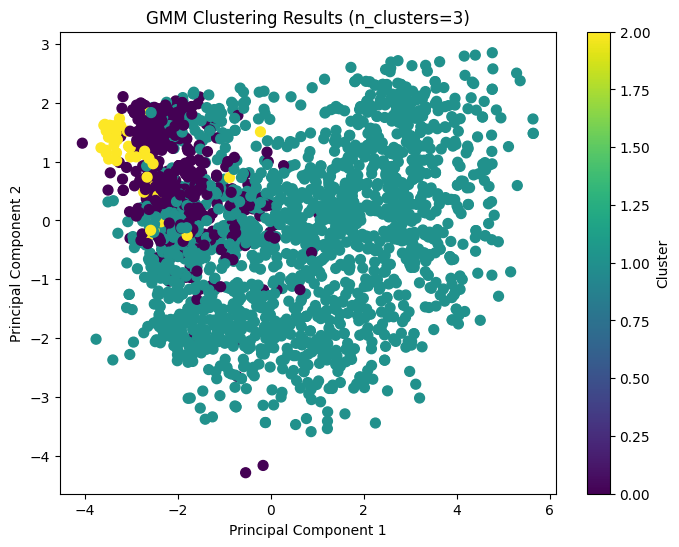

Silhouette Score: 0.0837265649289182


,Income,Kidhome,Teenhome,Recency,MntWines,MntMeatProducts,MntFishProducts,NumWebVisitsMonth,Complain,Z_CostContact,...,Education_PhD,Marital_Status_Alone,Marital_Status_Married,Marital_Status_Widow,Marital_Status_YOLO,Age,Tenure,Total_campaigns,Purchase_frequency,Cluster
0,0.299651,0.0,0.0,0.307039,1.005751,2.210169,2.190303,0.724452,0.0,3.0,...,0,0,0,0,0,1.007064,1.531185,-0.439037,1.380023,1
1,-0.263808,1.0,1.0,-0.383664,-0.879539,-0.810358,-0.746320,-0.127397,0.0,3.0,...,0,0,0,0,0,1.261969,-1.190545,-0.439037,-1.163336,0
2,0.943420,0.0,0.0,-0.798086,0.374300,-0.133536,1.954878,-0.553322,0.0,3.0,...,0,0,0,0,0,0.327318,-0.205773,-0.439037,0.844579,1
3,-1.204881,1.0,0.0,-0.798086,-0.879539,-0.732048,-0.548067,0.298528,0.0,3.0,...,0,0,0,0,0,-1.287080,-1.061881,-0.439037,-0.895614,0
4,0.307056,1.0,0.0,1.550305,-0.390089,-0.183879,0.344072,-0.127397,0.0,3.0,...,1,0,1,0,0,-1.032175,-0.953012,-0.439037,0.576857,1


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Load the dataset
file_path = '../data/marketing_campaign_final.csv'
df = pd.read_csv(file_path)

# Drop non-numeric columns (if any) and columns that don't contribute to clustering
df_clean = df.select_dtypes(include=['float64', 'int64'])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)

# Find the optimal number of clusters using AIC and BIC
aic_scores = []
bic_scores = []
sil_scores = []
n_components_range = range(2, 11)  # Test for cluster sizes between 2 and 10

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(X_scaled)
    aic_scores.append(gmm.aic(X_scaled))
    bic_scores.append(gmm.bic(X_scaled))
    
    # Calculate silhouette score for each clustering
    labels = gmm.predict(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, labels))

# Plot AIC, BIC, and Silhouette Score to determine optimal clusters
plt.figure(figsize=(12, 6))

# AIC and BIC Plot
plt.subplot(1, 2, 1)
plt.plot(n_components_range, aic_scores, label='AIC', color='blue')
plt.plot(n_components_range, bic_scores, label='BIC', color='red')
plt.title('AIC and BIC for different number of components')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.legend()

# Silhouette Score Plot
plt.subplot(1, 2, 2)
plt.plot(n_components_range, sil_scores, marker='o', color='green')
plt.title('Silhouette Score for different number of components')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# Choose the optimal number of clusters based on AIC, BIC, and silhouette score
optimal_clusters = 3  # Based on the previous visual analysis, choose the optimal number
gmm = GaussianMixture(n_components=optimal_clusters, random_state=42)
gmm.fit(X_scaled)

# Predict the cluster labels
labels = gmm.predict(X_scaled)

# Perform PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters in 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.title(f'GMM Clustering Results (n_clusters={optimal_clusters})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Calculate silhouette score for the chosen clusters
sil_score = silhouette_score(X_scaled, labels)
print(f'Silhouette Score: {sil_score}')

# Add cluster labels to the original dataframe for inspection
df['Cluster'] = labels

# Show the first few rows of the dataframe with cluster labels
df.head()


# DBSCAN

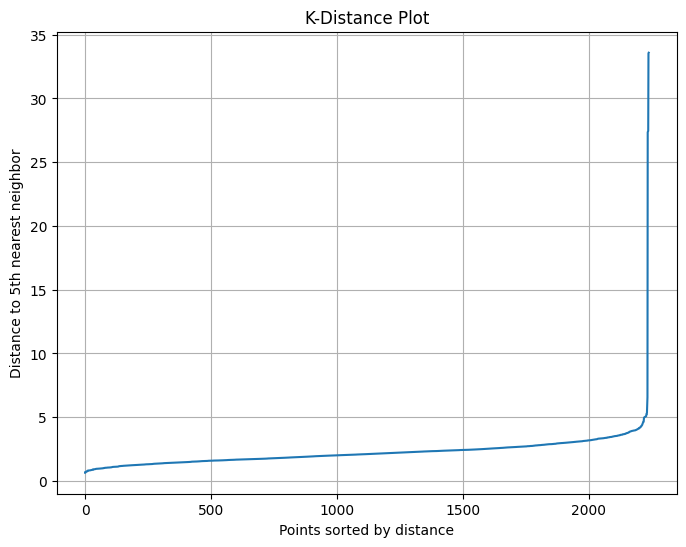

Number of clusters found: 0
Cluster labels: {-1}
DBSCAN could not find multiple clusters.


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

# Load the dataset
file_path = '../data/marketing_campaign_final.csv'
df = pd.read_csv(file_path)

# Drop non-numeric columns (if any) and columns that don't contribute to clustering
df_clean = df.select_dtypes(include=['float64', 'int64'])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)

# K-distance plot to find the optimal eps
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Sort the distances to plot the K-distance graph
distances = np.sort(distances[:, -1], axis=0)

plt.figure(figsize=(8, 6))
plt.plot(distances)
plt.title('K-Distance Plot')
plt.xlabel('Points sorted by distance')
plt.ylabel('Distance to 5th nearest neighbor')
plt.grid(True)
plt.show()

# Based on the K-distance plot, choose an optimal eps value
# Let's try with eps = 0.5 and min_samples = 5 for a better number of clusters
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Check the number of clusters (excluding noise points labeled as -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

# Print the number of clusters
print(f'Number of clusters found: {n_clusters}')
print(f'Cluster labels: {set(labels)}')

# Plot the results if there are more than one cluster
if n_clusters > 1:
    # Perform PCA for 2D visualization
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    # Plot DBSCAN results in 2D PCA space
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
    plt.title(f'DBSCAN Clustering Results (n_clusters={n_clusters})')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(label='Cluster')
    plt.show()

    # Calculate silhouette score
    sil_score = silhouette_score(X_scaled, labels)
    print(f'Silhouette Score: {sil_score}')
else:
    print("DBSCAN could not find multiple clusters.")


# This is the most important step for choosing a good eps value.

The idea is to calculate the distance to the 5th nearest neighbor for each point.

We sort those distances and plot them.

Look for the "elbow" point — where the distance starts increasing sharply. That’s a good eps.# We apply DBSCAN using our chosen values:

eps=0.5: neighborhood radius

min_samples=5: a cluster must have at least 5 points# Why only one cluster?

If almost all points are labeled the same (like 0) or as noise (-1), DBSCAN is unable to find dense regions of points that form distinct clusters.

# This usually happens if:

eps is too small (points don’t reach minimum density)

min_samples is too high (not enough neighbors to be a core point)

Or the data is not naturally separable into clustersWhy is Silhouette Score not computed?

# The silhouette score requires at least 2 clusters to calculate how well-separated they are.

If DBSCAN finds only one cluster, the silhouette score is meaningless, so it throws an error or is skipped.

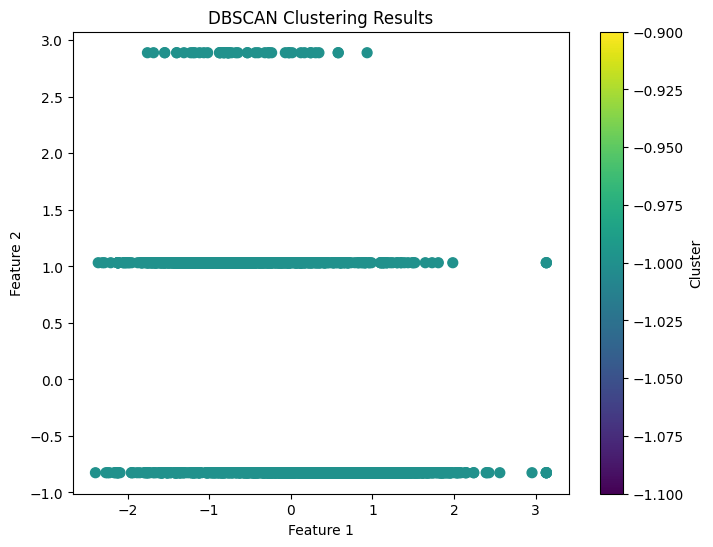

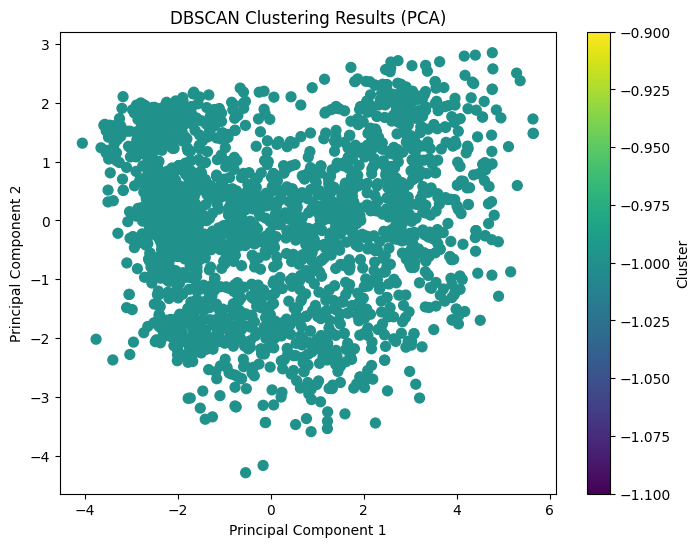

Silhouette score cannot be calculated, only one cluster found.


,Income,Kidhome,Teenhome,Recency,MntWines,MntMeatProducts,MntFishProducts,NumWebVisitsMonth,Complain,Z_CostContact,...,Education_PhD,Marital_Status_Alone,Marital_Status_Married,Marital_Status_Widow,Marital_Status_YOLO,Age,Tenure,Total_campaigns,Purchase_frequency,DBSCAN_Cluster
0,0.299651,0.0,0.0,0.307039,1.005751,2.210169,2.190303,0.724452,0.0,3.0,...,0,0,0,0,0,1.007064,1.531185,-0.439037,1.380023,-1
1,-0.263808,1.0,1.0,-0.383664,-0.879539,-0.810358,-0.746320,-0.127397,0.0,3.0,...,0,0,0,0,0,1.261969,-1.190545,-0.439037,-1.163336,-1
2,0.943420,0.0,0.0,-0.798086,0.374300,-0.133536,1.954878,-0.553322,0.0,3.0,...,0,0,0,0,0,0.327318,-0.205773,-0.439037,0.844579,-1
3,-1.204881,1.0,0.0,-0.798086,-0.879539,-0.732048,-0.548067,0.298528,0.0,3.0,...,0,0,0,0,0,-1.287080,-1.061881,-0.439037,-0.895614,-1
4,0.307056,1.0,0.0,1.550305,-0.390089,-0.183879,0.344072,-0.127397,0.0,3.0,...,1,0,1,0,0,-1.032175,-0.953012,-0.439037,0.576857,-1


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Load the dataset
file_path = '../data/marketing_campaign_final.csv'
df = pd.read_csv(file_path)

# Drop non-numeric columns (if any) and columns that don't contribute to clustering
df_clean = df.select_dtypes(include=['float64', 'int64'])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)

# Apply DBSCAN
# eps is the maximum distance between two samples for them to be considered as in the same neighborhood
# min_samples is the number of samples in a neighborhood to form a core point
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# DBSCAN does not assign a cluster label to noise points, which are labeled as -1
# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=50)
plt.title('DBSCAN Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()

# Perform PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot DBSCAN results in 2D PCA space
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.title('DBSCAN Clustering Results (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Calculate silhouette score (only valid for non-noise points)
if len(set(labels)) > 1:  # If more than one cluster (excluding noise)
    sil_score = silhouette_score(X_scaled, labels)
    print(f'Silhouette Score: {sil_score}')
else:
    print("Silhouette score cannot be calculated, only one cluster found.")

# Add cluster labels to the original dataframe for inspection
df['DBSCAN_Cluster'] = labels

# Show the first few rows of the dataframe with cluster labels
df.head()
